## Jupyter notebook for computing correlations between compartment replicates across time
This notebook is the code for computing the correlations between replicates of the compartments data from the time course Hi-C used in the paper **"Simultaneous analysis of open chromatin, promoter interactions and gene expression in stimulated T cells implicates causal genes for rheumatoid arthritis"** by Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Xiangyu Ge, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre. 

Author : *Jing Yang*  <br />
Date: 24-10-2019 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

### load packages

In [1]:
library(reshape2)
library(hicrep)
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
times1 <- c(rep(c(0,20,40,60,180,220,240), each=4), rep(c(1200, 1380, 1420, 1440), each=2))


### load AB compartment data for both replicates

In [ ]:
T0_rep1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T0_rep1_40x80kb.PC1.txt', header=F, row.names=1)
T20_rep1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T20_rep1_40x80kb.PC1.txt', header=F, row.names=1)
T1H_rep1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T1H_rep1_40x80kb.PC1.txt', header=F, row.names=1)
T4H_rep1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T4H_rep1_40x80kb.PC1.txt', header=F, row.names=1)
T24H_rep1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T24H_rep1_40x80kb.PC1.txt', header=F, row.names=1)

In [ ]:
T0_rep2 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T0_rep2_40x80kb.PC1.txt', header=F, row.names=1)
T20_rep2 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T20_rep2_40x80kb.PC1.txt', header=F, row.names=1)
T1H_rep2 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T1H_rep2_40x80kb.PC1.txt', header=F, row.names=1)
T4H_rep2 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/T4H_rep2_40x80kb.PC1.txt', header=F, row.names=1)

In [ ]:
names(T0_rep1) <- c('chr','start','end','strand','T01')
names(T0_rep2) <- c('chr','start','end','strand','T02')
names(T20_rep1) <- c('chr','start','end','strand','T201')
names(T20_rep2) <- c('chr','start','end','strand','T202')
names(T1H_rep1) <- c('chr','start','end','strand','T1H1')
names(T1H_rep2) <- c('chr','start','end','strand','T1H2')
names(T4H_rep1) <- c('chr','start','end','strand','T4H1')
names(T4H_rep2) <- c('chr','start','end','strand','T4H2')
names(T24H_rep1) <- c('chr','start','end','strand','T24H1')


### calculate the correlations between AB compartment data

In [ ]:
data_T0 <- merge(T0_rep1, T0_rep2)
data_T20 <- merge(T20_rep1, T20_rep2)
data_T1H <- merge(T1H_rep1, T1H_rep2)
data_T4H <- merge(T4H_rep1, T4H_rep2)
data_T24H <- T24H_rep1


In [ ]:
data <- merge(merge(merge(merge(data_T0, data_T20),data_T1H), data_T4H), data_T24H)
data_sorted <- data[with(data, order(chr, start)),]

In [ ]:
label1 <- 'Within Replicate 1'
label2 <- 'Within Replicate 2'
label12 <- 'Between Replicates 1&2'

In [ ]:
corr0 <- c( cor(data_sorted$T01, data_sorted$T02), cor(data_sorted$T201, data_sorted$T202),
            cor(data_sorted$T1H1, data_sorted$T1H2), cor(data_sorted$T4H1, data_sorted$T4H2))
label0 <- c(label12, label12, label12, label12)
corr20 <- c( cor(data_sorted$T01, data_sorted$T202), cor(data_sorted$T02, data_sorted$T201),
            cor(data_sorted$T01, data_sorted$T201), cor(data_sorted$T02, data_sorted$T202))
label20 <- c(label12, label12, label1, label2)
corr40 <- c( cor(data_sorted$T202, data_sorted$T1H1), cor(data_sorted$T201, data_sorted$T1H2),
            cor(data_sorted$T1H1, data_sorted$T201), cor(data_sorted$T202, data_sorted$T1H2))
label40 <- c(label12, label12, label1, label2)
corr60 <- c( cor(data_sorted$T01, data_sorted$T1H2), cor(data_sorted$T02, data_sorted$T1H2),            
            cor(data_sorted$T01, data_sorted$T1H1), cor(data_sorted$T02, data_sorted$T1H1))
label60 <- c(label12, label2, label1, label12)
corr220 <- c( cor(data_sorted$T201, data_sorted$T4H2), cor(data_sorted$T202, data_sorted$T4H2),
            cor(data_sorted$T201, data_sorted$T4H1), cor(data_sorted$T202, data_sorted$T4H1))
label220 <- c(label12, label2, label1, label12)
corr180 <- c( cor(data_sorted$T1H1, data_sorted$T4H2), cor(data_sorted$T1H2, data_sorted$T4H2),
            cor(data_sorted$T1H1, data_sorted$T4H1), cor(data_sorted$T1H2, data_sorted$T4H1))
label180 <- c(label12, label2, label1, label12)
corr240 <- c( cor(data_sorted$T01, data_sorted$T4H2), cor(data_sorted$T02, data_sorted$T4H2),
            cor(data_sorted$T01, data_sorted$T4H1), cor(data_sorted$T02, data_sorted$T4H1))
label240 <- c(label12, label2, label1, label12)
corr1440 <- c(cor(data_sorted$T01, data_sorted$T24H1), cor(data_sorted$T02, data_sorted$T24H1))
label1440 <- c(label1, label12)
corr1420 <- c(cor(data_sorted$T201, data_sorted$T24H1), cor(data_sorted$T202, data_sorted$T24H1))
label1420 <- c(label1, label12)
corr1380 <- c(cor(data_sorted$T1H1, data_sorted$T24H1), cor(data_sorted$T1H2, data_sorted$T24H1))
label1380 <- c(label1, label12)
corr1200 <- c(cor(data_sorted$T4H1, data_sorted$T24H1), cor(data_sorted$T4H2, data_sorted$T24H1))
label1200 <- c(label1, label12)


In [ ]:
data_forplot_AB <- data.frame(x=times1, y=c(corr0, corr20, corr40, corr60, corr180, corr220, corr240, 
                                         corr1200, corr1380, corr1420, corr1440),
                          label=c(label0, label20, label40, label60, label180, label220, label240, 
                                  label1200, label1380, label1420, label1440))
save(data_forplot_AB, file='data/AC_correlation_0210.RData')

### calculate the correlation for HiC data. This step is very slow, I will just use the results I saved before for the plotting

### read data for HiC correlation calculation

In [3]:
load('data/HiC_correlation_hhat1_0210.RData')
load('data/AC_correlation_0210.RData')

In [4]:
data_forplot_AB$category <- 'A/B compartment'
data_forplot_hic$category <- 'Hi-C'
data_forplot <- rbind(data_forplot_AB, data_forplot_hic)
data_forplot$category <- factor(data_forplot$category, levels=c('Hi-C','A/B compartment'))

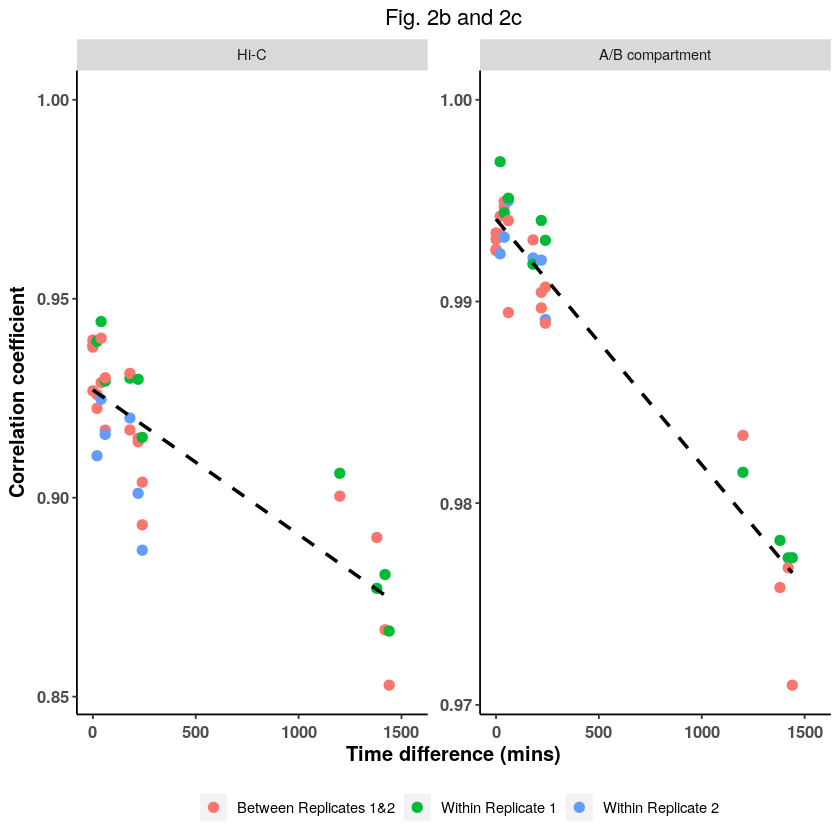

In [5]:
pcombined <- ggplot(data_forplot, aes(x=x, y=y)) + geom_point(aes(color=label), size=2.5) + 
geom_smooth(method="glm", color='black', se=FALSE, linetype='dashed') +
xlab('Time difference (mins)') + ylab('Correlation coefficient') + 
#ggtitle('Correlations between A/B compartment (Fig. 2c)') +
#scale_color_brewer('Set4') +
scale_y_continuous(limits=c(NA,1))+ xlim(c(NA,1550)) +
theme(
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  panel.background = element_blank(),
  plot.title = element_text(hjust=0.5),
  legend.title=element_blank(), legend.position='bottom',
  axis.title=element_text(size=12,face="bold", hjust=0.5),
  axis.text.x = element_text(hjust = 0.5, vjust=0.5, size=10, face="bold"),
  axis.text.y = element_text(size=10, face="bold"),
  axis.line = element_line(colour = "black"))  + guides(fill=guide_legend(label.hjust=0.5)) + 
  ggtitle('Fig. 2b and 2c') + facet_wrap(category~., scales='free_y')

#ggsave('/home/mqbssjy5/Dropbox (The University of Manchester)/IntegratingATAC-RNA-HiC/Individual_Figures_Files/HiC_and_ABcompartment/pca+hic_correlation_2020.pdf',
#       pcombined)
pcombined